In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

In [5]:
# Load the data
file_path = '/home/69a75dc5-ad63-486d-8dbd-271a53b9786b/NOC INCIDENTS.xlsx'  # Use forward slashes or raw string to avoid escape characters
data = pd.read_excel(file_path)

In [7]:
# Convert 'Open Time' and 'Resolved Time' to datetime
data['Open Time'] = pd.to_datetime(data['Open Time'])
data['Resolved Time'] = pd.to_datetime(data['Resolved Time'])

In [9]:
# Extract day, month, and year from 'Open Time'
data['Year'] = data['Open Time'].dt.year
data['Month'] = data['Open Time'].dt.month
data['Day'] = data['Open Time'].dt.day

In [11]:
# Filter data for the last few months to predict July 2024 trends
recent_months_data = data[data['Open Time'] >= '2024-01-01']

In [13]:
# Group by 'Year', 'Month', 'Day', 'Area', and 'Subcategory' to see the number of incidents
daily_trends = data.groupby(['Year', 'Month', 'Day', 'Area', 'Subcategory']).size().reset_index(name='Incident Count')

In [15]:
# Calculate the average daily incidents for each 'Area' and 'Subcategory'
average_daily_trends = daily_trends.groupby(['Area', 'Subcategory', 'Day'])['Incident Count'].mean().reset_index(name='Average Daily Incident Count')

In [17]:
# Pivot the data for heatmap using 'Area' instead of 'Subcategory'
pivot_table = average_daily_trends.pivot_table(index='Area', columns='Day', values='Average Daily Incident Count')

In [44]:
# Define the custom colors for the colormap
colors = ['white', 'green', 'yellow', 'red']
cmap = mcolors.ListedColormap(colors)

In [46]:
# Define a normalization that will map 0 to the first color (white) and anything else to the second and third colors
norm = mcolors.BoundaryNorm(boundaries=[-0.5, 1.0, 2.0, 4.5, 10.0], ncolors=4)

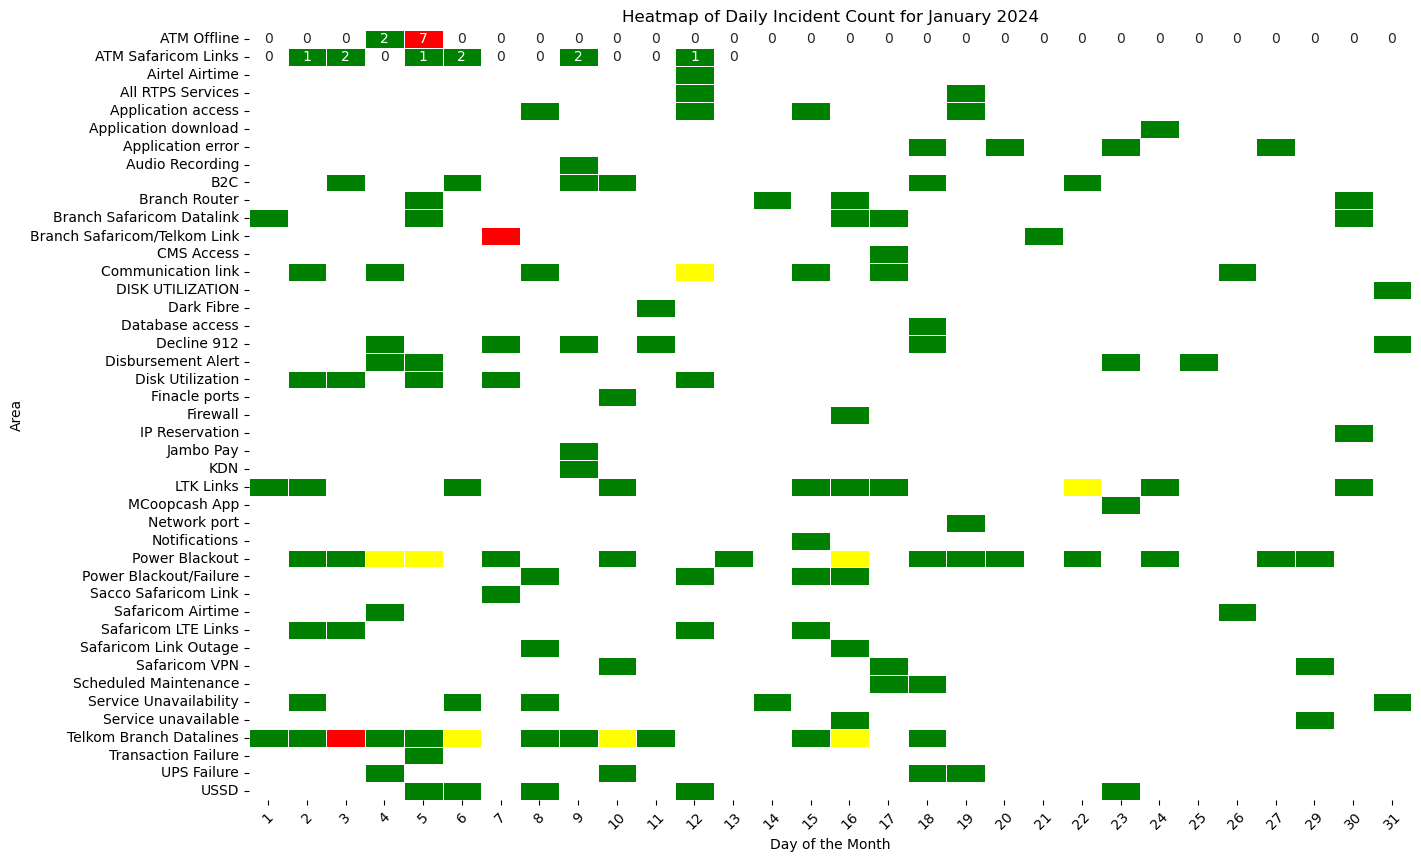

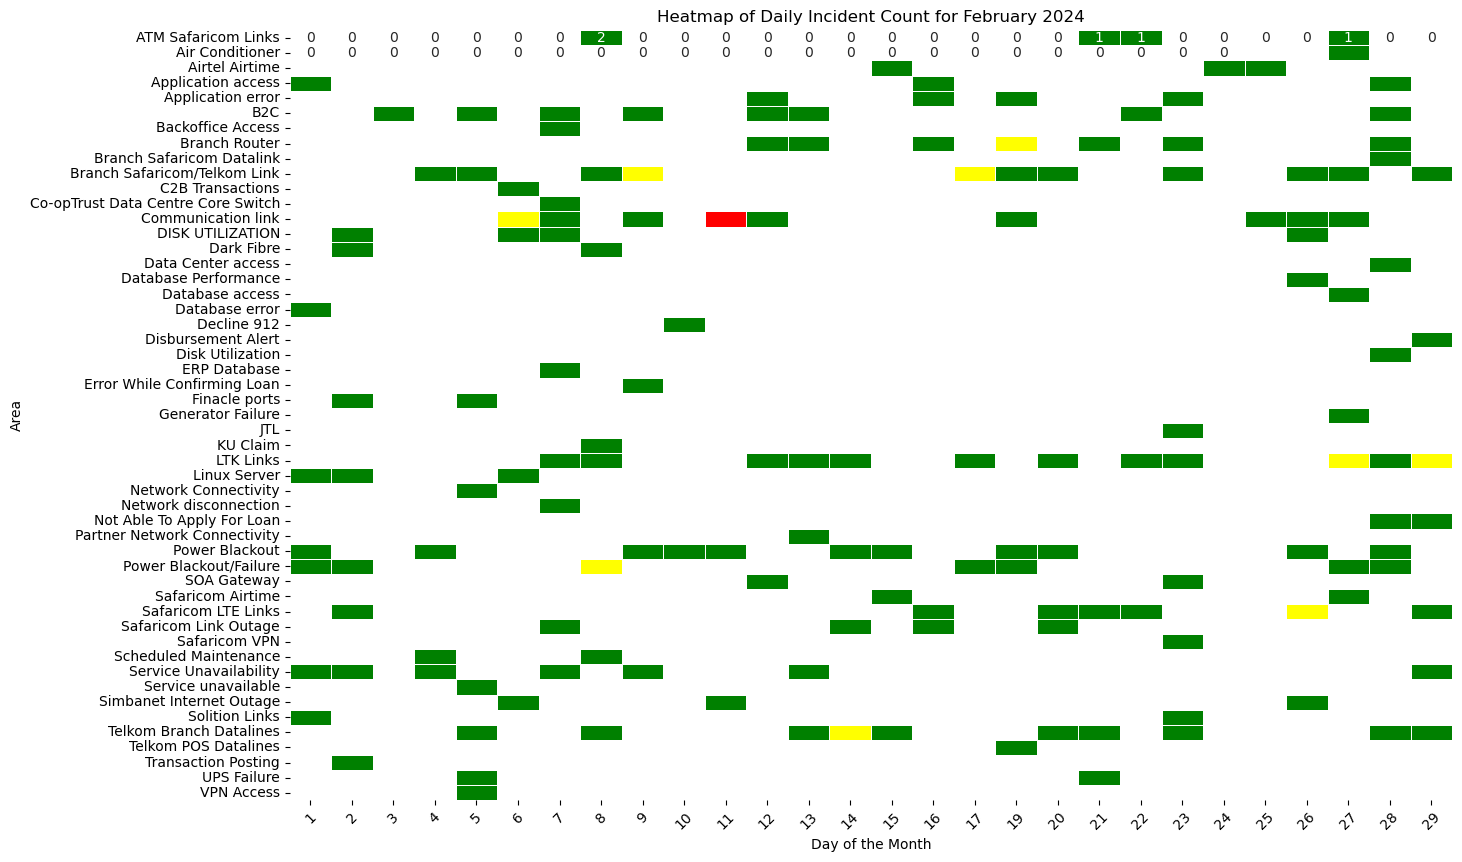

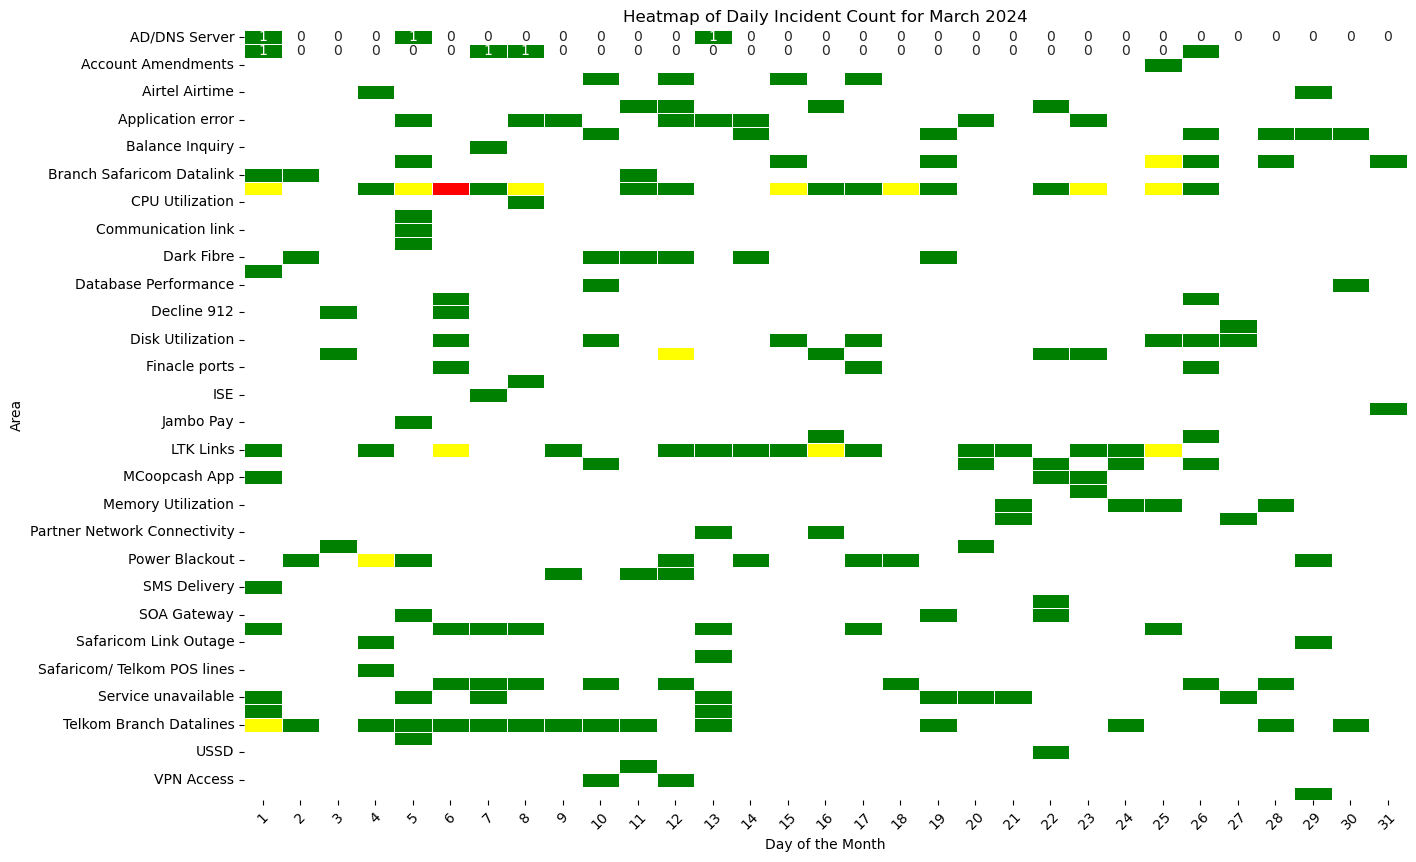

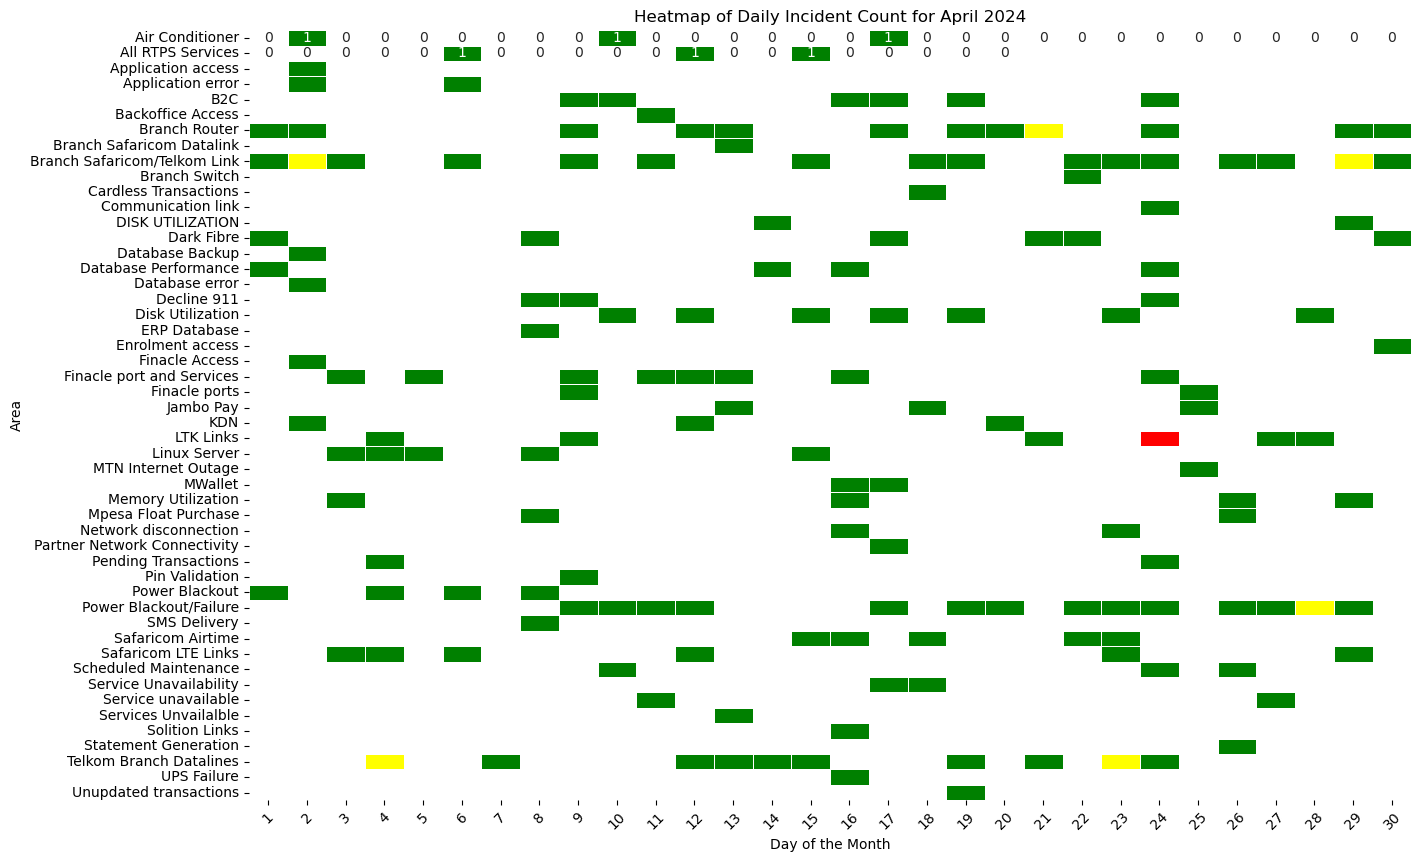

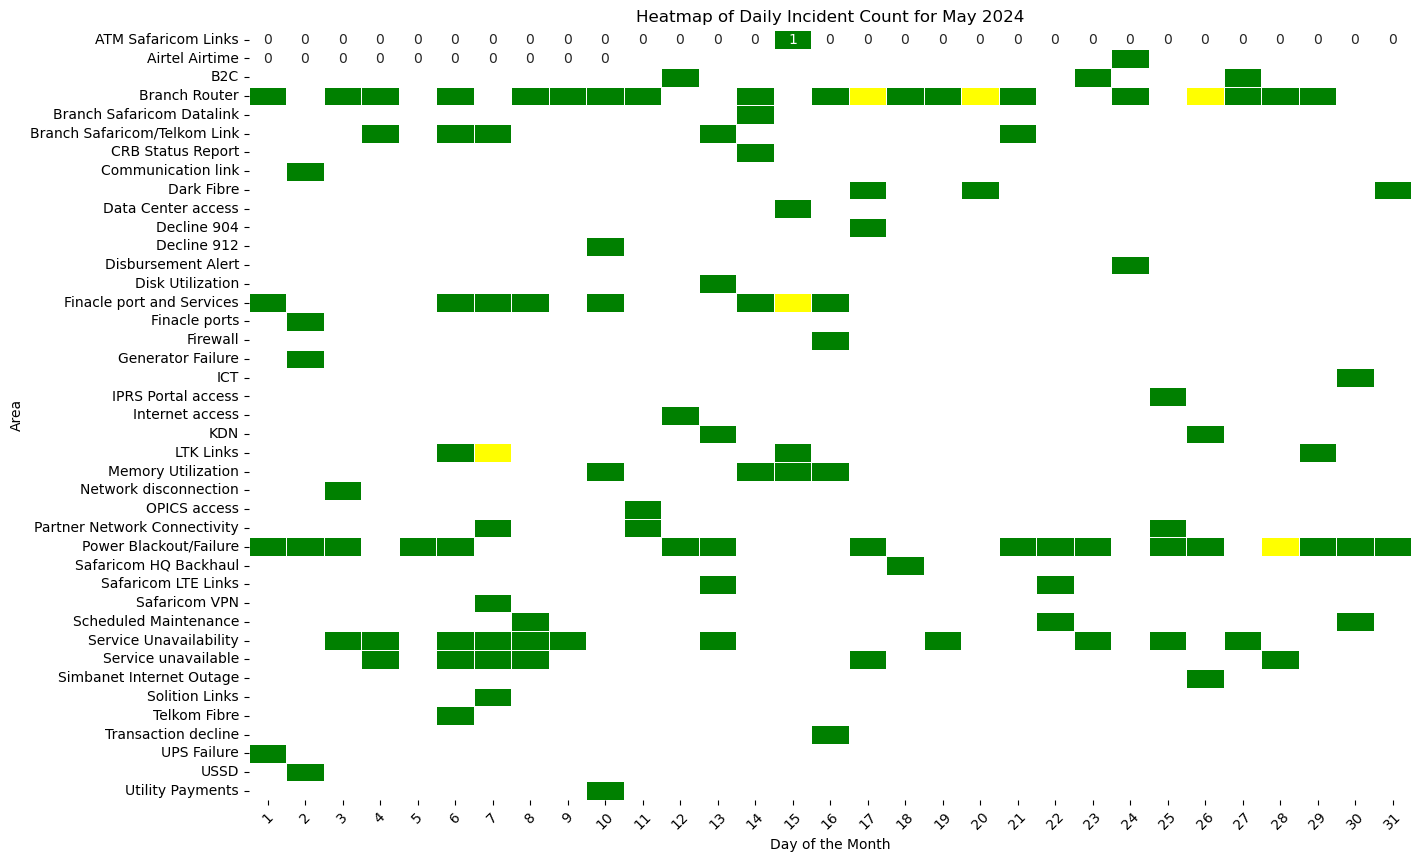

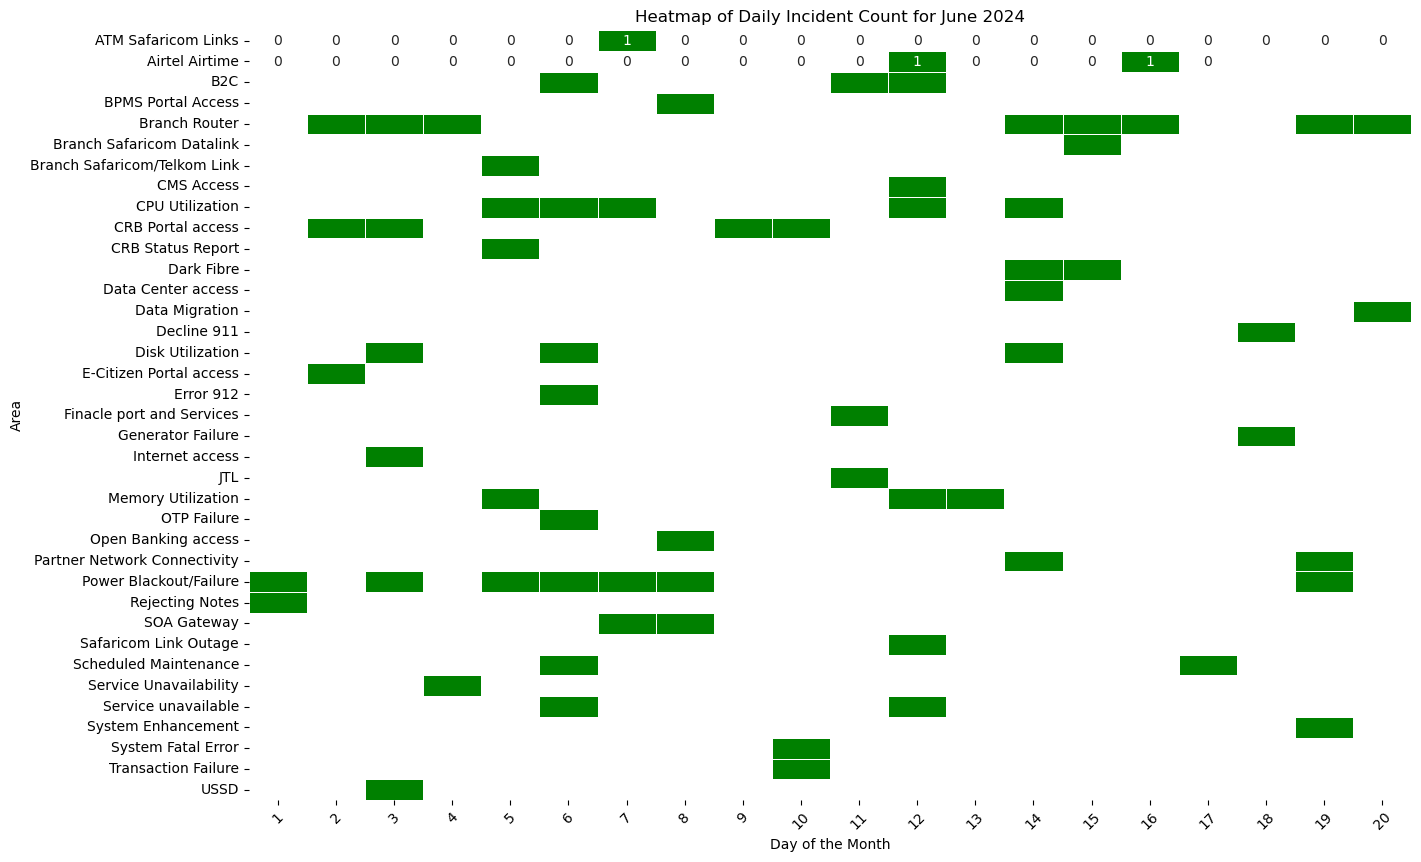

In [48]:
# Function to plot heatmap for a specific month
def plot_monthly_heatmap(month):
    monthly_data = daily_trends[daily_trends['Month'] == month]
    pivot_table = monthly_data.pivot_table(index='Area', columns='Day', values='Incident Count', fill_value=0)

    plt.figure(figsize=(15, 10))
    sns.heatmap(pivot_table, annot=True, cmap=cmap, norm=norm, linewidths=.5, cbar=False)

    month_name = pd.to_datetime(f'2024-{month:02d}-01').strftime('%B')
    plt.title(f'Heatmap of Daily Incident Count for {month_name} 2024')
    plt.xlabel('Day of the Month')
    plt.ylabel('Area')
    plt.xticks(rotation=45)
    plt.show()

# Plot heatmaps for each month from January to June
for month in range(1, 7):
    plot_monthly_heatmap(month)